In [1]:
import pickle
#from utils import DependencyTree, syn_ant, doDatasFrames, conjuntos
import pandas as pd
import numpy as np
# Spacy's modelSeñal
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import networkx as nx

In [2]:
path='./insumos/'

In [3]:
infile = open(path+ 'PDTB-Comparison-contrast-concession-explicit-implicit.pickle','rb')
data = pd.DataFrame(pickle.load(infile))
infile.close()

In [4]:
data #todo el dataframe completo 7217 tripletas

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
1,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,176,PDTB2::wsj_1120::176::CHANGED,\n,data/raw/11/wsj_1120
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
15,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,1416,PDTB2::wsj_1120::1416::CHANGED,\n,data/raw/11/wsj_1120
20,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,1574,PDTB2::wsj_1120::1574::SAME,\n,data/raw/11/wsj_1120
31,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2463..2466,PDTB2::wsj_1120::2463..2466::CHANGED,\n,data/raw/11/wsj_1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47174,Explicit,However,,,,,Mr. Simon said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6634..6641,PDTB2::wsj_2265::6634..6641::CHANGED,\n,data/raw/22/wsj_2265
47178,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,he added,,,,,,6965,PDTB2::wsj_2265::6965::CHANGED,\n,data/raw/22/wsj_2265
47180,Implicit,,,,,,,although,Comparison.Concession.Arg2-as-denier,,...,,,,,,,7115,PDTB2::wsj_2265::7115::CHANGED,\n,data/raw/22/wsj_2265
47182,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,7225..7228,PDTB2::wsj_2265::7225..7228::CHANGED,LINK6\n,data/raw/22/wsj_2265


## Separación por tipo de relación Contraste y Concesión
## Así como Identificar cuantos conectivos hay en cada grupo

In [5]:
c_c=data[data['SClass1A']=='Comparison.Contrast']
c_s=data[data['SClass1A']!='Comparison.Contrast']

In [6]:
len(c_c['Conn1'].unique())

26

In [7]:
len(c_s['Conn1'].unique())

47

## Separación por grupos donde hubo cambios del PDTB2 al PDTB3

In [8]:
dfCHANGED = data[data['Provenance'].str.contains('CHANGED', case=False)]
dfCHANGED

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
1,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,176,PDTB2::wsj_1120::176::CHANGED,\n,data/raw/11/wsj_1120
15,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,1416,PDTB2::wsj_1120::1416::CHANGED,\n,data/raw/11/wsj_1120
31,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2463..2466,PDTB2::wsj_1120::2463..2466::CHANGED,\n,data/raw/11/wsj_1120
36,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2877,PDTB2::wsj_1120::2877::CHANGED,\n,data/raw/11/wsj_1120
45,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3554,PDTB2::wsj_1120::3554::CHANGED,\n,data/raw/11/wsj_1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47166,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5960..5963,PDTB2::wsj_2265::5960..5963::CHANGED,\n,data/raw/22/wsj_2265
47174,Explicit,However,,,,,Mr. Simon said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6634..6641,PDTB2::wsj_2265::6634..6641::CHANGED,\n,data/raw/22/wsj_2265
47178,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,he added,,,,,,6965,PDTB2::wsj_2265::6965::CHANGED,\n,data/raw/22/wsj_2265
47180,Implicit,,,,,,,although,Comparison.Concession.Arg2-as-denier,,...,,,,,,,7115,PDTB2::wsj_2265::7115::CHANGED,\n,data/raw/22/wsj_2265


In [9]:
dfSAME = data[data['Provenance'].str.contains('SAME', case=False)]
dfSAME

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
20,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,1574,PDTB2::wsj_1120::1574::SAME,\n,data/raw/11/wsj_1120
70,Explicit,though,,,,,,though,Comparison.Contrast,,...,,,,,,,5169..5175,PDTB2::wsj_1120::5169..5175::SAME,\n,data/raw/11/wsj_1120
119,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,3527..3530,PDTB2::wsj_1193::3527..3530::SAME,\n,data/raw/11/wsj_1193
167,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3642,PDTB2::wsj_1161::3642::SAME,\n,data/raw/11/wsj_1161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47118,Implicit,,,,,,,whereas,Comparison.Contrast,,...,,,,,,,1475,PDTB2::wsj_2265::1475::SAME,\n,data/raw/22/wsj_2265
47128,Implicit,,,,,,,whereas,Comparison.Contrast,,...,,,,,,,2041,PDTB2::wsj_2265::2041::SAME,\n,data/raw/22/wsj_2265
47161,Implicit,,,,,,,whereas,Comparison.Contrast,,...,,,,,,,5603,PDTB2::wsj_2265::5603::SAME,\n,data/raw/22/wsj_2265
47163,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,5738..5741,PDTB2::wsj_2265::5738..5741::SAME,\n,data/raw/22/wsj_2265


In [10]:
dfPDTB3 = data[data['Provenance'].str.contains('PDTB3', case=False)]
dfPDTB3

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
37,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3013,PDTB3,LINK4\n,data/raw/11/wsj_1120
58,Explicit,and,,,,,,and,Comparison.Contrast,,...,,,,,,,4291..4294,PDTB3,\n,data/raw/11/wsj_1120
372,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,218..221,PDTB3,\n,data/raw/11/wsj_1159
449,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5732..5735,PDTB3,\n,data/raw/11/wsj_1131
558,Explicit,Whatever,,,,,,whatever,Comparison.Concession.Arg1-as-denier,,...,,,,,ARGM-ADV,predict,5012..5020,PDTB3,\n,data/raw/11/wsj_1192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46933,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2938..2941,PDTB3,\n,data/raw/22/wsj_2281
46967,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,482,PDTB3,LINK1\n,data/raw/22/wsj_2256
46982,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,2252..2255,PDTB3,\n,data/raw/22/wsj_2256
47064,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6824..6827,PDTB3,\n,data/raw/22/wsj_2230


In [11]:
dfNOCHANGED = pd.concat([dfSAME, dfPDTB3], axis=0)
dfNOCHANGED

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
20,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,1574,PDTB2::wsj_1120::1574::SAME,\n,data/raw/11/wsj_1120
70,Explicit,though,,,,,,though,Comparison.Contrast,,...,,,,,,,5169..5175,PDTB2::wsj_1120::5169..5175::SAME,\n,data/raw/11/wsj_1120
119,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,3527..3530,PDTB2::wsj_1193::3527..3530::SAME,\n,data/raw/11/wsj_1193
167,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3642,PDTB2::wsj_1161::3642::SAME,\n,data/raw/11/wsj_1161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46933,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2938..2941,PDTB3,\n,data/raw/22/wsj_2281
46967,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,482,PDTB3,LINK1\n,data/raw/22/wsj_2256
46982,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,2252..2255,PDTB3,\n,data/raw/22/wsj_2256
47064,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6824..6827,PDTB3,\n,data/raw/22/wsj_2230


### Estos subgrupos dividirlos en contraste y concesión (Explícitos e Implícitos)

In [12]:
dfCHANGEDContrast = dfCHANGED[dfCHANGED['SClass1A'].str.contains('Comparison.Contrast', case=False)]
dfCHANGEDContrast

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
15,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,1416,PDTB2::wsj_1120::1416::CHANGED,\n,data/raw/11/wsj_1120
45,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3554,PDTB2::wsj_1120::3554::CHANGED,\n,data/raw/11/wsj_1120
66,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,4767,PDTB2::wsj_1120::4767::CHANGED,\n,data/raw/11/wsj_1120
69,Explicit,Whereas,,,,,,whereas,Comparison.Contrast,,...,,,,,,,5106..5113,PDTB2::wsj_1120::5106..5113::CHANGED,\n,data/raw/11/wsj_1120
569,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,847,PDTB2::wsj_1146::847::CHANGED,\n,data/raw/11/wsj_1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45774,Implicit,,,,,,he says,in contrast,Comparison.Contrast,,...,,,,,,,1895,PDTB2::wsj_2201::1895::CHANGED,\n,data/raw/22/wsj_2201
45978,Explicit,By comparison,,,,,,by comparison,Comparison.Contrast,,...,,,,,,,1446..1459,PDTB2::wsj_2210::1446..1459::CHANGED,\n,data/raw/22/wsj_2210
46398,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,2649,PDTB2::wsj_2222::2649::CHANGED,\n,data/raw/22/wsj_2222
46782,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,220..223,PDTB2::wsj_2231::220..223::CHANGED,\n,data/raw/22/wsj_2231


In [13]:
dfCHANGEDContrastExplicit = dfCHANGEDContrast[dfCHANGEDContrast['Relation Type']=='Explicit']
dfCHANGEDContrastExplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
69,Explicit,Whereas,,,,,,whereas,Comparison.Contrast,,...,,,,,,,5106..5113,PDTB2::wsj_1120::5106..5113::CHANGED,\n,data/raw/11/wsj_1120
3290,Explicit,But,,,,,,but,Comparison.Contrast,,...,,,,,,,1049..1052,PDTB2::wsj_0151::1049..1052::CHANGED,\n,data/raw/01/wsj_0151
4074,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,3175..3178,PDTB2::wsj_0100::3175..3178::CHANGED,\n,data/raw/01/wsj_0100
4149,Explicit,But,,,,,,but,Comparison.Contrast,,...,Justice Department and FTC officials said,,,,,,1000..1003,PDTB2::wsj_0119::1000..1003::CHANGED,\n,data/raw/01/wsj_0119
4308,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,194..197,PDTB2::wsj_0565::194..197::CHANGED,\n,data/raw/05/wsj_0565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,Explicit,But,,,,,,but,Comparison.Contrast,,...,,,,,,,4350..4353,PDTB2::wsj_2387::4350..4353::CHANGED,\n,data/raw/23/wsj_2387
45521,Explicit,In fact,,,,,,in fact,Comparison.Contrast,,...,Budget indicated,in which renters earn frequent-flier miles and...,,,,,813..820,PDTB2::wsj_2394::813..820::CHANGED,LINK1\n,data/raw/23/wsj_2394
45677,Explicit,Not like,,,,,"At Donaldson, Lufkin & Jenrette Inc., head equ...",like,Comparison.Contrast,,...,,,,,,,5291..5299,PDTB2::wsj_2232::5291::CHANGED,\n,data/raw/22/wsj_2232
45978,Explicit,By comparison,,,,,,by comparison,Comparison.Contrast,,...,,,,,,,1446..1459,PDTB2::wsj_2210::1446..1459::CHANGED,\n,data/raw/22/wsj_2210


In [14]:
dfCHANGEDContrastImplicit = dfCHANGEDContrast[dfCHANGEDContrast['Relation Type']=='Implicit']
dfCHANGEDContrastImplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
15,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,1416,PDTB2::wsj_1120::1416::CHANGED,\n,data/raw/11/wsj_1120
45,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3554,PDTB2::wsj_1120::3554::CHANGED,\n,data/raw/11/wsj_1120
66,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,4767,PDTB2::wsj_1120::4767::CHANGED,\n,data/raw/11/wsj_1120
569,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,847,PDTB2::wsj_1146::847::CHANGED,\n,data/raw/11/wsj_1146
662,Implicit,,,,,,,whereas,Comparison.Contrast,,...,,,,,,,6201,PDTB2::wsj_1146::6201::CHANGED,\n,data/raw/11/wsj_1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44490,Implicit,,,,,,,on the contrary,Comparison.Contrast,,...,,,,,,,1999,PDTB2::wsj_2366::1999::CHANGED,\n,data/raw/23/wsj_2366
45208,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,4915,PDTB2::wsj_2397::4915::CHANGED,\n,data/raw/23/wsj_2397
45774,Implicit,,,,,,he says,in contrast,Comparison.Contrast,,...,,,,,,,1895,PDTB2::wsj_2201::1895::CHANGED,\n,data/raw/22/wsj_2201
46398,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,2649,PDTB2::wsj_2222::2649::CHANGED,\n,data/raw/22/wsj_2222


In [15]:
dfCHANGEDConcession = dfCHANGED[dfCHANGED['SClass1A'].str.contains('Concession', case=False)]
dfCHANGEDConcession

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
1,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,176,PDTB2::wsj_1120::176::CHANGED,\n,data/raw/11/wsj_1120
31,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2463..2466,PDTB2::wsj_1120::2463..2466::CHANGED,\n,data/raw/11/wsj_1120
36,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2877,PDTB2::wsj_1120::2877::CHANGED,\n,data/raw/11/wsj_1120
61,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4412..4415,PDTB2::wsj_1120::4412..4415::CHANGED,\n,data/raw/11/wsj_1120
74,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5569..5572,PDTB2::wsj_1120::5569..5572::CHANGED,\n,data/raw/11/wsj_1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47166,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5960..5963,PDTB2::wsj_2265::5960..5963::CHANGED,\n,data/raw/22/wsj_2265
47174,Explicit,However,,,,,Mr. Simon said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6634..6641,PDTB2::wsj_2265::6634..6641::CHANGED,\n,data/raw/22/wsj_2265
47178,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,he added,,,,,,6965,PDTB2::wsj_2265::6965::CHANGED,\n,data/raw/22/wsj_2265
47180,Implicit,,,,,,,although,Comparison.Concession.Arg2-as-denier,,...,,,,,,,7115,PDTB2::wsj_2265::7115::CHANGED,\n,data/raw/22/wsj_2265


In [16]:
dfCHANGEDConcessionExplicit = dfCHANGEDConcession[dfCHANGEDConcession['Relation Type']=='Explicit']
dfCHANGEDConcessionExplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
31,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2463..2466,PDTB2::wsj_1120::2463..2466::CHANGED,\n,data/raw/11/wsj_1120
61,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4412..4415,PDTB2::wsj_1120::4412..4415::CHANGED,\n,data/raw/11/wsj_1120
74,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5569..5572,PDTB2::wsj_1120::5569..5572::CHANGED,\n,data/raw/11/wsj_1120
89,Explicit,however,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6842..6849,PDTB2::wsj_1120::6842..6849::CHANGED,\n,data/raw/11/wsj_1120
92,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,98..101,PDTB2::wsj_1193::98..101::CHANGED,\n,data/raw/11/wsj_1193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47155,Explicit,But,,,,,according to an analyst,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4858..4861,PDTB2::wsj_2265::4858..4861::CHANGED,\n,data/raw/22/wsj_2265
47164,Explicit,However,,,,,the analyst said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5765..5772,PDTB2::wsj_2265::5765..5772::CHANGED,\n,data/raw/22/wsj_2265
47166,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5960..5963,PDTB2::wsj_2265::5960..5963::CHANGED,\n,data/raw/22/wsj_2265
47174,Explicit,However,,,,,Mr. Simon said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6634..6641,PDTB2::wsj_2265::6634..6641::CHANGED,\n,data/raw/22/wsj_2265


In [17]:
dfCHANGEDConcessionImplicit = dfCHANGEDConcession[dfCHANGEDConcession['Relation Type']=='Implicit']
dfCHANGEDConcessionImplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
1,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,176,PDTB2::wsj_1120::176::CHANGED,\n,data/raw/11/wsj_1120
36,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2877,PDTB2::wsj_1120::2877::CHANGED,\n,data/raw/11/wsj_1120
80,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5944,PDTB2::wsj_1120::5944::CHANGED,\n,data/raw/11/wsj_1120
112,Implicit,,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2718,PDTB2::wsj_1193::2718::CHANGED,\n,data/raw/11/wsj_1193
129,Implicit,,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,960,PDTB2::wsj_1141::960::CHANGED,\n,data/raw/11/wsj_1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46964,Implicit,,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,310,PDTB2::wsj_2256::310::CHANGED,\n,data/raw/22/wsj_2256
47098,Implicit,,,,,,he said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1179,PDTB2::wsj_2218::1179::CHANGED,\n,data/raw/22/wsj_2218
47162,Implicit,,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5692,PDTB2::wsj_2265::5692::CHANGED,\n,data/raw/22/wsj_2265
47178,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,he added,,,,,,6965,PDTB2::wsj_2265::6965::CHANGED,\n,data/raw/22/wsj_2265


In [18]:
dfNOCHANGEDContrast = dfNOCHANGED[dfNOCHANGED['SClass1A'].str.contains('Comparison.Contrast', case=False)]
dfNOCHANGEDContrast

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
20,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,1574,PDTB2::wsj_1120::1574::SAME,\n,data/raw/11/wsj_1120
70,Explicit,though,,,,,,though,Comparison.Contrast,,...,,,,,,,5169..5175,PDTB2::wsj_1120::5169..5175::SAME,\n,data/raw/11/wsj_1120
119,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,3527..3530,PDTB2::wsj_1193::3527..3530::SAME,\n,data/raw/11/wsj_1193
167,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3642,PDTB2::wsj_1161::3642::SAME,\n,data/raw/11/wsj_1161
307,Explicit,By comparison,,,,,,by comparison,Comparison.Contrast,,...,,,,,,,6976..6989,PDTB2::wsj_1154::6976..6989::SAME,\n,data/raw/11/wsj_1154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46693,Implicit,,,,,,he says,in contrast,Comparison.Contrast,,...,,,,,,,9879,PDTB3,LINK15\n,data/raw/22/wsj_2276
46777,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,510,PDTB3,\n,data/raw/22/wsj_2271
46967,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,482,PDTB3,LINK1\n,data/raw/22/wsj_2256
46982,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,2252..2255,PDTB3,\n,data/raw/22/wsj_2256


In [19]:
dfNOCHANGEDContrastExplicit = dfNOCHANGEDContrast[dfNOCHANGEDContrast['Relation Type']=='Explicit']
dfNOCHANGEDContrastExplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
70,Explicit,though,,,,,,though,Comparison.Contrast,,...,,,,,,,5169..5175,PDTB2::wsj_1120::5169..5175::SAME,\n,data/raw/11/wsj_1120
119,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,3527..3530,PDTB2::wsj_1193::3527..3530::SAME,\n,data/raw/11/wsj_1193
307,Explicit,By comparison,,,,,,by comparison,Comparison.Contrast,,...,,,,,,,6976..6989,PDTB2::wsj_1154::6976..6989::SAME,\n,data/raw/11/wsj_1154
414,Explicit,In contrast,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,3029..3040,PDTB2::wsj_1131::3029..3040::SAME,\n,data/raw/11/wsj_1131
432,Explicit,In contrast,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,4127..4138,PDTB2::wsj_1131::4127..4138::SAME,\n,data/raw/11/wsj_1131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44916,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,2459..2462,PDTB3,\n,data/raw/23/wsj_2347
46132,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,4713..4716,PDTB3,\n,data/raw/22/wsj_2223
46520,Explicit,as,,,,,,as,Comparison.Contrast,,...,,,,,ARGM-ADV,execute,2981..2983,PDTB3,\n,data/raw/22/wsj_2282
46982,Explicit,but,,,,,,but,Comparison.Contrast,,...,,,,,,,2252..2255,PDTB3,\n,data/raw/22/wsj_2256


In [20]:
dfNOCHANGEDContrastImplicit = dfNOCHANGEDContrast[dfNOCHANGEDContrast['Relation Type']=='Implicit']
dfNOCHANGEDContrastImplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
20,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,1574,PDTB2::wsj_1120::1574::SAME,\n,data/raw/11/wsj_1120
167,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,3642,PDTB2::wsj_1161::3642::SAME,\n,data/raw/11/wsj_1161
485,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,8502,PDTB2::wsj_1131::8502::SAME,\n,data/raw/11/wsj_1131
623,Implicit,,,,,,,by contrast,Comparison.Contrast,,...,,,,,,,4254,PDTB2::wsj_1146::4254::SAME,\n,data/raw/11/wsj_1146
640,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,5387,PDTB2::wsj_1146::5387::SAME,LINK5\n,data/raw/11/wsj_1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46596,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,1501,PDTB3,\n,data/raw/22/wsj_2276
46626,Implicit,,,,,,,but,Comparison.Contrast,,...,,,,,,,4376,PDTB3,LINK8\n,data/raw/22/wsj_2276
46693,Implicit,,,,,,he says,in contrast,Comparison.Contrast,,...,,,,,,,9879,PDTB3,LINK15\n,data/raw/22/wsj_2276
46777,Implicit,,,,,,,in contrast,Comparison.Contrast,,...,,,,,,,510,PDTB3,\n,data/raw/22/wsj_2271


In [21]:
dfNOCHANGEDConcession = dfNOCHANGED[dfNOCHANGED['SClass1A'].str.contains('Concession', case=False)]
dfNOCHANGEDConcession

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
293,Implicit,,,,,,,nevertheless,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5617,PDTB2::wsj_1154::5617::SAME,\n,data/raw/11/wsj_1154
404,Explicit,Although,,,,,,although,Comparison.Concession.Arg1-as-denier,,...,,,,,,,2254..2262,PDTB2::wsj_1131::2254..2262::SAME,\n,data/raw/11/wsj_1131
451,Explicit,even though,,,,,,even though,Comparison.Concession.Arg1-as-denier,,...,,,,,,,5997..6008,PDTB2::wsj_1131::5997..6008::SAME,\n,data/raw/11/wsj_1131
455,Explicit,even though,,,,,,even though,Comparison.Concession.Arg1-as-denier,,...,,,,,,,6163..6174,PDTB2::wsj_1131::6163..6174::SAME,\n,data/raw/11/wsj_1131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46426,Explicit,without,,,,,,without,Comparison.Concession.Arg2-as-denier,,...,,,,,ARGM-ADV,use,1939..1946,PDTB3,\n,data/raw/22/wsj_2250
46556,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,150..153,PDTB3,\n,data/raw/22/wsj_2219
46578,Implicit,,,,,,,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,162,PDTB3,\n,data/raw/22/wsj_2276
46933,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2938..2941,PDTB3,\n,data/raw/22/wsj_2281


In [22]:
dfNOCHANGEDConcessionExplicit = dfNOCHANGEDConcession[dfNOCHANGEDConcession['Relation Type']=='Explicit']
dfNOCHANGEDConcessionExplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
404,Explicit,Although,,,,,,although,Comparison.Concession.Arg1-as-denier,,...,,,,,,,2254..2262,PDTB2::wsj_1131::2254..2262::SAME,\n,data/raw/11/wsj_1131
451,Explicit,even though,,,,,,even though,Comparison.Concession.Arg1-as-denier,,...,,,,,,,5997..6008,PDTB2::wsj_1131::5997..6008::SAME,\n,data/raw/11/wsj_1131
455,Explicit,even though,,,,,,even though,Comparison.Concession.Arg1-as-denier,,...,,,,,,,6163..6174,PDTB2::wsj_1131::6163..6174::SAME,\n,data/raw/11/wsj_1131
565,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,289..292,PDTB2::wsj_1146::289..292::SAME,\n,data/raw/11/wsj_1146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46211,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2542..2545,PDTB3,LINK2\n,data/raw/22/wsj_2239
46426,Explicit,without,,,,,,without,Comparison.Concession.Arg2-as-denier,,...,,,,,ARGM-ADV,use,1939..1946,PDTB3,\n,data/raw/22/wsj_2250
46556,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,150..153,PDTB3,\n,data/raw/22/wsj_2219
46933,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2938..2941,PDTB3,\n,data/raw/22/wsj_2281


In [23]:
dfNOCHANGEDConcessionImplicit = dfNOCHANGEDConcession[dfNOCHANGEDConcession['Relation Type']=='Implicit']
dfNOCHANGEDConcessionImplicit

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
293,Implicit,,,,,,,nevertheless,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5617,PDTB2::wsj_1154::5617::SAME,\n,data/raw/11/wsj_1154
2432,Implicit,,,,,,,although,Comparison.Concession.Arg1-as-denier,,...,,,,,,,549,PDTB2::wsj_0167::549::SAME,\n,data/raw/01/wsj_0167
2433,Implicit,,,,,,,although,Comparison.Concession.Arg1-as-denier,,...,,,,,,,754,PDTB2::wsj_0167::754::SAME,\n,data/raw/01/wsj_0167
2515,Implicit,,,,,,he said,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4968,PDTB2::wsj_0128::4968::SAME,\n,data/raw/01/wsj_0128
2765,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,23161,PDTB2::wsj_0118::23161::SAME,\n,data/raw/01/wsj_0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45286,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,135,PDTB3,\n,data/raw/23/wsj_2368
45551,Implicit,,,,,,,yet,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2241,PDTB3,LINK1\n,data/raw/22/wsj_2205
45801,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4024,PDTB3,LINK4\n,data/raw/22/wsj_2201
45999,Implicit,,,,,,,although,Comparison.Concession.Arg1-as-denier,,...,,,,,ARGM-ADV,recoup,3935,PDTB3,\n,data/raw/22/wsj_2210


### Cálculo de estadística y validación de conjuntos


In [24]:
count_c=0
count_c_e=0
count_c_i=0
count_s=0 #concesion
count_s_e=0
count_s_i=0
for index,strings in data.iterrows():
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Concession" in strings['SClass1A']):
        count_s+=1
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Concession" in strings['SClass1A'] and strings['Relation Type']=='Explicit'):
        count_s_e+=1
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Concession" in strings['SClass1A'] and strings['Relation Type']=='Implicit'):
        count_s_i+=1
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Contrast" in strings['SClass1A']):
        count_c+=1
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Contrast" in strings['SClass1A'] and strings['Relation Type']=='Explicit'):
        count_c_e+=1
    if("CHANGED" in strings['Provenance'] and "PDTB2" in strings['Provenance'] and "Contrast" in strings['SClass1A'] and strings['Relation Type']=='Implicit'):
        count_c_i+=1
print(count_c)
print(count_c_e)
print(count_c_i)
print(count_s)
print(count_s_e)
print(count_s_i)

233
95
138
3867
2825
1042


In [25]:
dfContrasteData = data[data['SClass1A']=='Comparison.Contrast']
print(dfContrasteData.shape)
dfConcesionData = data[data['SClass1A']!='Comparison.Contrast']
print(dfConcesionData.shape)

(1702, 35)
(5515, 35)


In [26]:
print(dfContrasteData[dfContrasteData['Relation Type']=='Explicit'].shape)
print(dfContrasteData[dfContrasteData['Relation Type']=='Implicit'].shape)

(909, 35)
(793, 35)


In [27]:
print(dfConcesionData[dfConcesionData['Relation Type']=='Explicit'].shape)
print(dfConcesionData[dfConcesionData['Relation Type']=='Implicit'].shape)

(4155, 35)
(1360, 35)


In [28]:
dfConcesionData

,Relation Type,Conn SpanList,Conn Src,Conn Type,Conn Pol,Conn Det,Conn Feat SpanList,Conn1,SClass1A,SClass1B,...,Arg2 Feat SpanList,Sup2 SpanList,Adju Reason,Adju Disagr,PB Role,PB Verb,Offset,Provenance,Link,File
1,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,176,PDTB2::wsj_1120::176::CHANGED,\n,data/raw/11/wsj_1120
12,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,1234..1237,PDTB2::wsj_1120::1234..1237::SAME,\n,data/raw/11/wsj_1120
31,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2463..2466,PDTB2::wsj_1120::2463..2466::CHANGED,\n,data/raw/11/wsj_1120
36,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,2877,PDTB2::wsj_1120::2877::CHANGED,\n,data/raw/11/wsj_1120
61,Explicit,But,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,4412..4415,PDTB2::wsj_1120::4412..4415::CHANGED,\n,data/raw/11/wsj_1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47166,Explicit,but,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,,,,,,,5960..5963,PDTB2::wsj_2265::5960..5963::CHANGED,\n,data/raw/22/wsj_2265
47174,Explicit,However,,,,,Mr. Simon said,however,Comparison.Concession.Arg2-as-denier,,...,,,,,,,6634..6641,PDTB2::wsj_2265::6634..6641::CHANGED,\n,data/raw/22/wsj_2265
47178,Implicit,,,,,,,but,Comparison.Concession.Arg2-as-denier,,...,he added,,,,,,6965,PDTB2::wsj_2265::6965::CHANGED,\n,data/raw/22/wsj_2265
47180,Implicit,,,,,,,although,Comparison.Concession.Arg2-as-denier,,...,,,,,,,7115,PDTB2::wsj_2265::7115::CHANGED,\n,data/raw/22/wsj_2265


In [29]:
dfExpl = data[data['Relation Type']=='Explicit']
print(dfExpl.shape)
dfImpl = data[data['Relation Type']=='Implicit']
print(dfImpl.shape)

(5064, 35)
(2153, 35)


# Antonimia-Sinonimia

In [30]:
from nltk.corpus import wordnet as wn

In [31]:
name = 'salida/' + 'antonymy_synonymy_Sets3.pickle'

In [32]:
infile = open(name, 'rb')
ant_syn, limits= pickle.load(infile)

In [33]:
ant_syn

{'max': 530,
 1: {'synonyms': ['pure',
   'severe',
   'gross',
   'desolate',
   'crude',
   'rough',
   'rank',
   'primitive',
   'downright',
   'bleak',
   'blunt',
   'bare',
   'raw',
   'stark',
   'over'],
  'antonyms': ['perfect',
   'complete',
   'net',
   'last',
   'absolute',
   'accomplished',
   'final']},
 2: {'synonyms': ['internal',
   'knowledgeable',
   'intimate',
   'informal',
   'home',
   'interior',
   'familiar',
   'inner',
   'inside',
   'sexual',
   'national'],
  'antonyms': ['taboo',
   'remote',
   'external',
   'outer',
   'international',
   'out',
   'outdoor',
   'local',
   'away',
   'outside']},
 3: {'synonyms': ['terminal', 'net', 'last', 'final', 'humble'],
  'antonyms': ['beginning', 'initiative', 'first', 'foremost']},
 4: {'synonyms': ['direct', 'less'],
  'antonyms': ['collateral', 'indirect', 'more']},
 5: {'synonyms': ['hinder', 'back'], 'antonyms': ['front']},
 6: {'synonyms': ['much'],
  'antonyms': ['slight', 'minuscule', 'trivial'

In [34]:
limits

{'ADJ': [1, 232], 'NOUN': [232, 351], 'VERB': [351, 496], 'ADV': [496, 531]}

# Método de representación de argumentos

In [35]:
def doDatasFramesp(data, nlp, ant_syn, limits):
    new_data = {'Main index' : [], 'Category' : [], 'Relation Type' : [],'Arg1 ant_syn' : [],'Connective' : [], 'Arg2 ant_syn' : [], 'Type' : [], 'Used Sets Arg1' : [], 'Used Sets Arg2' : []}    
    data_Rel = {'Main index':[], 'Category' : [],'Relation Type' : [],'Arg1' : [],'Connective' : [], 'Arg2' : [], 'Type' : [], 'Used Sets Arg1' : [], 'Used Sets Arg2' : []}
    anula1=[0 for i in range(ant_syn['max'])]
    anula2=[0 for i in range(ant_syn['max'])]
    nunca1=[0 for i in range(ant_syn['max'])]
    nunca2=[0 for i in range(ant_syn['max'])]
    i = 0
    neverOn=[]
    anulaOn=[]
    eliminado1=[]
    eliminado2=[]
    siseusa1=set()
    siseusa2=set()
    for index,row in data.iterrows():
        arg1 = row['Arg1 SpanList']
        arg1_dict = {i:[] for i in range(ant_syn['max'])}
        arg1_list = [0 for i in range(ant_syn['max'])]
        doc = nlp(arg1)
        phrase1 = ''
        for token in doc:
            word = token.text
            if token.pos_ in ['VERB', 'NOUN', 'ADV', 'ADJ']:
                for key in list(ant_syn.keys())[limits[token.pos_][0]:limits[token.pos_][1]]:
                    if token.lemma_.lower() in ant_syn[key]['antonyms']: # pos
                        arg1_dict[key-1].append(1)
                        word+='{'+str(key)+','+token.pos_+','+'R'+'}'
                        if key in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                            print("Se usan Ant en arg1")
                        if token.lemma_.lower() == "increase":
                            if token.pos_== 'ADJ':
                                print('ADJ')
                    if token.lemma_.lower() in ant_syn[key]['synonyms']: # neg
                        arg1_dict[key-1].append(-1)
                        word+='{'+str(key)+','+token.pos_+','+'L'+'}'
                        if key in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                            print("Se usan Syn en arg1")
                        if token.lemma_.lower() == "increase":
                            if token.pos_== 'ADJ':
                                print('ADJ')
            phrase1 += word
            phrase1 += ' '
        ##aplanar
        
        for key,value in zip(arg1_dict.keys(),arg1_dict.values()):
            if len(value) == 0:
                arg1_list[key] = 0
                nunca1[key]+=1
            else:
                if np.sum(np.array(value)) == 0:
                    arg1_list[key] = 66
                    anula1[key]+=1
                    #print('eliminación ', index)
                    eliminado1.append((key+1,index))
                    if key+1 in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                        print("Se anularon1")
                else:
                    arg1_list[key] = np.sum(np.array(value))
                    nunca1[key]=0
                    siseusa1.add(key+1)
                    if key+1 in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                        print("Si se usan1")
            
        arg2 = row['Arg2 SpanList']
        arg2_dict = {i:[] for i in range(ant_syn['max'])}
        arg2_list = [0 for i in range(ant_syn['max'])]
        
        doc1 = nlp(arg2)
        phrase2 = ''
        for token in doc1:
            word = token.text
            if token.pos_ in ['VERB', 'NOUN', 'ADV', 'ADJ']:
                for key in list(ant_syn.keys())[limits[token.pos_][0]:limits[token.pos_][1]]:
                    if token.lemma_.lower() in ant_syn[key]['antonyms']: # pos
                        arg2_dict[key-1].append(1)
                        word+='{'+str(key)+','+token.pos_+','+'R'+'}'
                        if key in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                                print("Se usan Ant en arg2")
                        if token.lemma_.lower() == "increase":
                            if token.pos_== 'ADJ':
                                print('ADJ1')
                    if token.lemma_.lower() in ant_syn[key]['synonyms']: # neg
                        arg2_dict[key-1].append(-1)
                        word+='{'+str(key)+','+token.pos_+','+'L'+'}'
                        if key in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                            print("Se usan Syn en arg2")
                        if token.lemma_.lower() == "increase":
                            if token.pos_== 'ADJ':
                                print('ADJ2')
                        
            phrase2 += word
            phrase2 += ' '
        ##aplanar

        for key,value in zip(arg2_dict.keys(),arg2_dict.values()):
            if len(value) == 0:
                arg2_list[key] = 0
                nunca2[key]+=1
            else:
                if np.sum(np.array(value)) == 0:
                    arg2_list[key] = 66
                    anula2[key]+=1
                    #print('eliminación ', index)
                    eliminado2.append((key+1,index))
                    if key+1 in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                        print("Se anularon2")
                else:
                    
                    arg2_list[key] = np.sum(np.array(value))
                    nunca2[key]=0
                    siseusa2.add(key+1)
                    if key+1 in [201,214,503]:# {201, 214, 503}    ADJ, ADJ  ,ADV]
                        print("Si se usan2")
        #add in dictionary
        if np.sum(np.array(arg1_list))!=0 and np.sum(np.array(arg2_list))!=0:
            new_data['Main index'].append(index)
            new_data['Category'].append(row['SClass1A'])
            new_data['Relation Type'].append(row['Relation Type'])
            new_data['Arg1 ant_syn'].append(arg1_list)
            new_data['Connective'].append(row['Conn1'])
            new_data['Arg2 ant_syn'].append(arg2_list)
            if('CHANGED' in row['Provenance']):
                new_data['Type'].append('CHANGED')
            else:
                new_data['Type'].append('NOCHANGED')
            new_data['Used Sets Arg1'].append(np.where(np.array(arg1_list)!=0)[0])
            new_data['Used Sets Arg2'].append(np.where(np.array(arg2_list)!=0)[0])
            data_Rel['Main index'].append(index)
            data_Rel['Category'].append(row['SClass1A'])
            data_Rel['Relation Type'].append(row['Relation Type'])
            data_Rel['Arg1'].append(phrase1)
            data_Rel['Connective'].append(row['Conn1'])
            data_Rel['Arg2'].append(phrase2)
            if('CHANGED' in row['Provenance']):
                data_Rel['Type'].append('CHANGED')
            else:
                data_Rel['Type'].append('NOCHANGED')
            data_Rel['Used Sets Arg1'].append(np.where(np.array(arg1_list)!=0)[0])
            data_Rel['Used Sets Arg2'].append(np.where(np.array(arg2_list)!=0)[0])
        else:
            #print(arg1_dict)
            if 66 in arg1_dict.values():
                print(np.where(np.array(arg1_dict)==66)[0])
            if 66 in arg2_dict.values():
                print(np.where(np.array(arg2_dict)==66)[0])
            if np.sum(np.array(anula1))!=0 or np.sum(np.array(anula2))!=0:
                anulaOn.append(index)
            if np.sum(np.array(nunca1))!=0 or np.sum(np.array(nunca2))!=0:
                neverOn.append(index)
    return pd.DataFrame(new_data), pd.DataFrame(data_Rel),anulaOn,neverOn,nunca1,anula1,nunca2,anula2,eliminado1,eliminado2,siseusa1,siseusa2

In [36]:
#método para procesar y crear las representaciones de las tripletas
new_data, data_Rel,anulaOn,neverOn,nunca1,anula1,nunca2,anula2,eliminado1,eliminado2,siseusa1,siseusa2 = doDatasFramesp(data, nlp, ant_syn, limits)

### Estadística para validar el uso de los conjuntos 

In [37]:
print(len(anulaOn))
print(len(neverOn))
#anulaOn

1054
1054


## Ejemplo de la etiquetas que se procesan a los argumentos de cada tripleta

In [38]:
print(data_Rel.iloc[2].Arg1)

Japan does not have{352,VERB,L}{354,VERB,L}{357,VERB,L}{358,VERB,L}{359,VERB,L}{362,VERB,L}{364,VERB,L}{369,VERB,L}{371,VERB,L}{372,VERB,R}{374,VERB,L}{385,VERB,L}{416,VERB,R}{433,VERB,L}{436,VERB,L}{438,VERB,R}{449,VERB,L}{458,VERB,L}{462,VERB,R}{464,VERB,L}{465,VERB,L}{466,VERB,R}{489,VERB,L}{495,VERB,L} a modern{150,ADJ,L} government 


In [39]:
print(data_Rel.iloc[2]["Used Sets Arg1"]+1)

[150 352 354 357 358 359 362 364 369 371 372 374 385 416 433 436 438 449
 458 462 464 465 466 489 495]


In [40]:
data_Rel

,Main index,Category,Relation Type,Arg1,Connective,Arg2,Type,Used Sets Arg1,Used Sets Arg2
0,1,Comparison.Concession.Arg2-as-denier,Implicit,"Japan has climbed{351,VERB,L}{356,VERB,R}{494,...",but,"Now this remarkable economic growth{232,NOUN,L...",CHANGED,"[0, 1, 33, 39, 56, 198, 242, 350, 352, 355, 35...","[231, 232, 258, 351, 353, 355, 358, 363, 365, ..."
1,12,Comparison.Concession.Arg2-as-denier,Explicit,"The LDP won{353,VERB,L}{359,VERB,L}{370,VERB,R...",but,"less{4,ADJ,L}{202,ADJ,R} than two years later ...",NOCHANGED,"[0, 2, 199, 352, 358, 369, 379, 391, 427, 455,...","[3, 201, 275, 350, 351, 353, 354, 355, 358, 36..."
2,15,Comparison.Contrast,Implicit,"Japan does not have{352,VERB,L}{354,VERB,L}{35...",but,"Its government still wants to sit{355,VERB,R}{...",CHANGED,"[149, 351, 353, 356, 357, 358, 361, 363, 368, ...","[4, 237, 249, 275, 276, 351, 353, 354, 355, 35..."
3,20,Comparison.Contrast,Implicit,"Its government still wants to sit{355,VERB,R}{...",by contrast,"In a modern{150,ADJ,L} system , the government...",NOCHANGED,"[4, 237, 249, 275, 276, 351, 353, 354, 355, 35...","[5, 6, 121, 149, 185, 235, 249, 291, 351, 352,..."
4,36,Comparison.Concession.Arg2-as-denier,Implicit,"And the Ministry of Foreign Affairs works{352,...",but,"This ministry has done{352,VERB,L}{356,VERB,L}...",CHANGED,"[9, 36, 234, 237, 275, 276, 348, 351, 353, 354...","[232, 242, 257, 263, 299, 326, 351, 355, 356, ..."
...,...,...,...,...,...,...,...,...,...
6158,47166,Comparison.Concession.Arg2-as-denier,Explicit,"At one point{238,NOUN,L} in futures{261,NOUN,L...",but,"it was n't able{122,ADJ,R} to sustain{352,VERB...",CHANGED,"[26, 231, 237, 260, 350, 353, 354, 355, 381, 4...","[121, 231, 251, 351, 353, 356, 357, 358, 361, ..."
6159,47174,Comparison.Concession.Arg2-as-denier,Explicit,"Prices rose{351,VERB,L}{354,VERB,L}{355,VERB,L...",however,"after absorbing{359,VERB,L}{364,VERB,L}{386,VE...",CHANGED,"[350, 353, 354, 355, 381, 463, 493]","[6, 11, 66, 115, 176, 235, 263, 351, 353, 358,..."
6160,47178,Comparison.Concession.Arg2-as-denier,Implicit,"Colder weather is being predicted{424,VERB,L}{...",but,"That has n't yet captured{352,VERB,L}{354,VERB...",CHANGED,"[26, 96, 351, 353, 355, 358, 363, 365, 369, 37...","[351, 353, 358, 370, 384, 448, 463]"
6161,47182,Comparison.Concession.Arg2-as-denier,Explicit,"At one point{238,NOUN,L} in early{12,ADJ,L}{67...",but,"the price then fell{352,VERB,R}{364,VERB,R}{36...",CHANGED,"[11, 26, 66, 115, 237, 350, 353, 354, 355, 381...","[351, 363, 365, 367, 376, 419, 463, 481, 493, ..."


## Validación del uso de los conjuntos

In [41]:
c1=set()
c2=set()
for index,row in data_Rel.iterrows():
    for i in row['Used Sets Arg1']:
        c1.add(i+1)
    for i in row['Used Sets Arg2']:
        c2.add(i+1)
el1=set()
el2=set()
for t in eliminado1:
    el1.add(t[0])
for t in eliminado2:
    el2.add(t[0])
anulados1=el1.difference(c1)
anulados2=el2.difference(c2)

print(anulados1)
print(anulados2)

set()
set()


In [42]:
c=c1.union(c2)

In [43]:
len(c)

526

In [44]:
e=el1.union(el2)
len(e)

182

In [45]:
usos=siseusa1.union(siseusa2)
len(usos)

527

In [46]:
#se usan pero se anulan
usos.difference(c)

{156}

In [47]:
print(len(c1.difference(el1)))

363


In [48]:
siseusa1.difference(c1)

{78, 156, 332, 336, 345, 517}

In [49]:
todos=set(range(1,531))

In [50]:
print(len(todos.difference(c1)))
print(len(todos.difference(c2)))

21
13


In [51]:
c1.difference(siseusa1)
mt1=siseusa1.difference(c1)

In [52]:
mt1

{78, 156, 332, 336, 345, 517}

In [53]:
mt2=siseusa2.difference(c2)
mt2

{62, 198}

In [54]:
el1.difference(siseusa1)

set()

In [55]:
c2.difference(siseusa2)
siseusa2.difference(c2)

{62, 198}

In [56]:
conjuntos_no_usados1=todos.difference(siseusa1)
conjuntos_no_usados2=todos.difference(siseusa2)
print(len(conjuntos_no_usados1),conjuntos_no_usados1)
print(len(conjuntos_no_usados2),conjuntos_no_usados2)
print(el1.difference(siseusa1))
print(el2.difference(siseusa2))

15 {450, 503, 196, 201, 330, 203, 490, 205, 209, 337, 214, 311, 348, 253, 413}
11 {224, 68, 201, 338, 468, 341, 214, 503, 344, 156, 159}
set()
set()


In [57]:
conjuntos_no_usados1.intersection(conjuntos_no_usados2)

{201, 214, 503}

In [58]:
pt1 = conjuntos_no_usados1.intersection(siseusa2)
print(len(pt1),pt1)

12 {450, 196, 490, 203, 330, 205, 209, 337, 311, 348, 253, 413}


In [59]:
conjuntos_no_usados1.difference(pt1)

{201, 214, 503}

In [60]:
pt2 = conjuntos_no_usados2.intersection(siseusa1)
print(len(pt2),pt2)

8 {224, 68, 338, 468, 341, 344, 156, 159}


In [61]:
print(len(siseusa1.intersection(anulados1)),siseusa1.intersection(anulados1))
print(len(siseusa2.intersection(anulados2)),siseusa2.intersection(anulados2))

0 set()
0 set()


In [62]:
print(len(anulados1.difference(siseusa1)),anulados1.difference(siseusa1))
print(len(anulados2.difference(siseusa2)),anulados2.difference(siseusa2))

0 set()
0 set()


In [63]:
anulados1

set()

In [64]:
anulados2

set()

In [65]:
print(len(siseusa1)+len(conjuntos_no_usados1))
print(len(siseusa2)+len(conjuntos_no_usados2))

530
530


In [66]:
data_pastel_arg1=[0 for i in range(ant_syn['max'])]
data_pastel_arg2=[0 for i in range(ant_syn['max'])]
for index,row in data_Rel.iterrows():
    for a in row['Used Sets Arg1']:
        data_pastel_arg1[a]+=1
    for a in row['Used Sets Arg2']:
        data_pastel_arg2[a]+=1

In [67]:
print(data_pastel_arg2[155])
print(data_pastel_arg1[155])

0
0


In [68]:
data_pastel_arg1

[275,
 108,
 339,
 225,
 5,
 219,
 164,
 142,
 195,
 2,
 82,
 457,
 14,
 180,
 26,
 607,
 45,
 245,
 150,
 89,
 528,
 2,
 27,
 111,
 4,
 38,
 341,
 67,
 423,
 212,
 30,
 42,
 33,
 68,
 6,
 49,
 125,
 4,
 556,
 38,
 47,
 6,
 17,
 3,
 39,
 9,
 113,
 53,
 316,
 13,
 319,
 52,
 173,
 143,
 27,
 40,
 11,
 226,
 204,
 1,
 11,
 1,
 17,
 8,
 14,
 19,
 470,
 1,
 108,
 135,
 4,
 21,
 4,
 137,
 6,
 112,
 27,
 0,
 33,
 18,
 11,
 194,
 358,
 165,
 72,
 200,
 26,
 5,
 142,
 31,
 10,
 15,
 27,
 163,
 1,
 31,
 5,
 47,
 65,
 119,
 5,
 215,
 23,
 259,
 1,
 66,
 45,
 50,
 1,
 30,
 27,
 28,
 4,
 8,
 13,
 413,
 3,
 17,
 12,
 4,
 5,
 35,
 16,
 12,
 2,
 2,
 23,
 1,
 74,
 4,
 23,
 27,
 4,
 100,
 35,
 1,
 11,
 31,
 11,
 16,
 3,
 2,
 2,
 46,
 15,
 184,
 137,
 6,
 1,
 18,
 7,
 18,
 40,
 47,
 130,
 0,
 58,
 1,
 2,
 93,
 32,
 206,
 6,
 39,
 112,
 1,
 1,
 2,
 7,
 7,
 113,
 5,
 116,
 2,
 11,
 12,
 144,
 4,
 3,
 7,
 44,
 4,
 3,
 7,
 5,
 80,
 1,
 281,
 54,
 15,
 14,
 1,
 2,
 108,
 1,
 0,
 1,
 1,
 18,
 229,
 0,
 211,
 

In [69]:
final=data_pastel_arg1[:]
for i in range(len(data_pastel_arg1)):
    final[i]=data_pastel_arg1[i]+data_pastel_arg2[i]
final

[455,
 185,
 556,
 451,
 10,
 466,
 361,
 287,
 409,
 3,
 158,
 885,
 25,
 354,
 53,
 1201,
 77,
 504,
 311,
 170,
 1031,
 6,
 45,
 187,
 9,
 82,
 640,
 128,
 832,
 436,
 56,
 84,
 67,
 115,
 13,
 102,
 250,
 6,
 1093,
 75,
 97,
 11,
 39,
 4,
 81,
 20,
 217,
 98,
 602,
 23,
 576,
 97,
 330,
 237,
 61,
 68,
 18,
 436,
 394,
 4,
 23,
 1,
 36,
 17,
 31,
 38,
 889,
 1,
 228,
 242,
 8,
 40,
 7,
 259,
 15,
 186,
 62,
 2,
 96,
 34,
 19,
 391,
 713,
 317,
 160,
 398,
 41,
 10,
 281,
 56,
 19,
 18,
 55,
 311,
 5,
 59,
 10,
 95,
 122,
 234,
 7,
 428,
 50,
 512,
 5,
 126,
 92,
 115,
 5,
 62,
 56,
 55,
 6,
 15,
 23,
 790,
 5,
 35,
 25,
 8,
 11,
 70,
 28,
 20,
 9,
 6,
 40,
 2,
 140,
 6,
 48,
 67,
 9,
 199,
 71,
 8,
 26,
 59,
 34,
 28,
 14,
 6,
 3,
 86,
 25,
 357,
 259,
 11,
 9,
 37,
 21,
 43,
 85,
 105,
 259,
 0,
 114,
 2,
 2,
 179,
 55,
 430,
 10,
 77,
 222,
 4,
 3,
 3,
 11,
 14,
 217,
 10,
 232,
 4,
 25,
 20,
 273,
 5,
 13,
 9,
 93,
 5,
 6,
 12,
 9,
 193,
 3,
 556,
 92,
 27,
 25,
 3,
 6,
 200,
 2

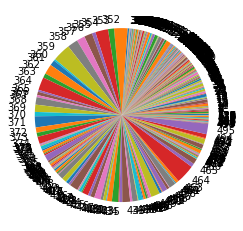

In [70]:
import matplotlib.pyplot as plt

nombres = [i+1 for i in range(ant_syn['max'])]
plt.pie(data_pastel_arg1, labels=nombres)
plt.show()

In [71]:
colores = ['Blue','coral', 'orangered']


In [72]:
conteo0=0
conteo1=0
conteo2=0
for a in data_pastel_arg1:
    if(a==0):
        conteo0+=1
    elif(a==1):
        conteo1+=1
    else:
        conteo2+=1

In [73]:
final=data_pastel_arg1

In [74]:
conteo0F=0
conteo1F=0
conteo2F=0
for a in final:
    if(a==0):
        conteo0F+=1
    elif(a==1):
        conteo1F+=1
    else:
        conteo2F+=1

In [75]:
for i in range(len(final)):
    if final[i]==0:
        print(i+1, final[i])

78 0
156 0
196 0
201 0
203 0
205 0
209 0
214 0
253 0
311 0
330 0
332 0
336 0
337 0
345 0
348 0
413 0
450 0
490 0
503 0
517 0


In [76]:
conteo0F

21

In [77]:
conteo1F

34

In [78]:
conteo2F

475

In [79]:
print(conteo0F,conteo1F,conteo2F)

21 34 475


In [80]:
anulados1

set()

In [81]:
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']

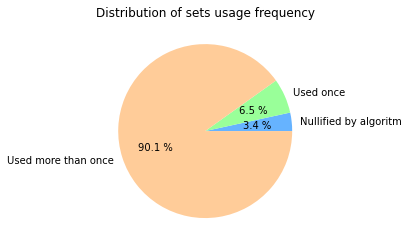

In [82]:
data_pastel2 = [conteo0F-3,conteo1F,conteo2F]
nombres2 = ["Nullified by algoritm","Used once","Used more than once"]
plt.title("Distribution of sets usage frequency")
plt.pie(data_pastel2, labels=nombres2, colors=colors, autopct="%0.1f %%")
plt.show()

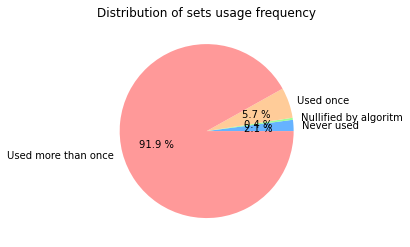

In [83]:
conteo0=0
conteo1=0
conteo2=0
for a in data_pastel_arg2:
    if(a==0):
        conteo0+=1
    elif(a==1):
        conteo1+=1
    else:
        conteo2+=1
data_pastel2 = [conteo0-2,2,conteo1,conteo2]
nombres2 = ["Never used","Nullified by algoritm","Used once","Used more than once"]
plt.title("Distribution of sets usage frequency")
plt.pie(data_pastel2, labels=nombres2, colors=colors,autopct="%0.1f %%")
plt.show()

In [84]:
print(conteo0,conteo1,conteo2)

13 30 487


# Dataframe con columnas de uso de conjuntos

In [95]:
new_data

,Main index,Category,Relation Type,Arg1 ant_syn,Connective,Arg2 ant_syn,Type,Used Sets Arg1,Used Sets Arg2
0,1,Comparison.Concession.Arg2-as-denier,Implicit,"[-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",but,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CHANGED,"[0, 1, 33, 39, 56, 198, 242, 350, 352, 355, 35...","[231, 232, 258, 351, 353, 355, 358, 363, 365, ..."
1,12,Comparison.Concession.Arg2-as-denier,Explicit,"[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",but,"[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NOCHANGED,"[0, 2, 199, 352, 358, 369, 379, 391, 427, 455,...","[3, 201, 275, 350, 351, 353, 354, 355, 358, 36..."
2,15,Comparison.Contrast,Implicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",but,"[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",CHANGED,"[149, 351, 353, 356, 357, 358, 361, 363, 368, ...","[4, 237, 249, 275, 276, 351, 353, 354, 355, 35..."
3,20,Comparison.Contrast,Implicit,"[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",by contrast,"[0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0...",NOCHANGED,"[4, 237, 249, 275, 276, 351, 353, 354, 355, 35...","[5, 6, 121, 149, 185, 235, 249, 291, 351, 352,..."
4,36,Comparison.Concession.Arg2-as-denier,Implicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0,...",but,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CHANGED,"[9, 36, 234, 237, 275, 276, 348, 351, 353, 354...","[232, 242, 257, 263, 299, 326, 351, 355, 356, ..."
...,...,...,...,...,...,...,...,...,...
6158,47166,Comparison.Concession.Arg2-as-denier,Explicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",but,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CHANGED,"[26, 231, 237, 260, 350, 353, 354, 355, 381, 4...","[121, 231, 251, 351, 353, 356, 357, 358, 361, ..."
6159,47174,Comparison.Concession.Arg2-as-denier,Explicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",however,"[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0,...",CHANGED,"[350, 353, 354, 355, 381, 463, 493]","[6, 11, 66, 115, 176, 235, 263, 351, 353, 358,..."
6160,47178,Comparison.Concession.Arg2-as-denier,Implicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",but,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CHANGED,"[26, 96, 351, 353, 355, 358, 363, 365, 369, 37...","[351, 353, 358, 370, 384, 448, 463]"
6161,47182,Comparison.Concession.Arg2-as-denier,Explicit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0,...",but,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CHANGED,"[11, 26, 66, 115, 237, 350, 353, 354, 355, 381...","[351, 363, 365, 367, 376, 419, 463, 481, 493, ..."


In [85]:
with open('./Contrast_Concession/filesPickle/PDTB-Comparison-contrast-concession-explicit-implicit-AnnotedCHANGED.pickle', 'wb') as pickle_file:
    pickle.dump(pd.DataFrame(data_Rel), pickle_file)
with open('./Contrast_Concession/filesPickle/PDTB-Comparison-contrast-concession-explicit-implicit-RepresentationsCHANGED.pickle', 'wb') as pickle_file:
    pickle.dump(pd.DataFrame(new_data), pickle_file)